In [1556]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn.decomposition import PCA

In [1557]:
data = np.load('data.npz')
x = data['data']

In [1558]:
x.shape

(1001, 2048)

TASK 1

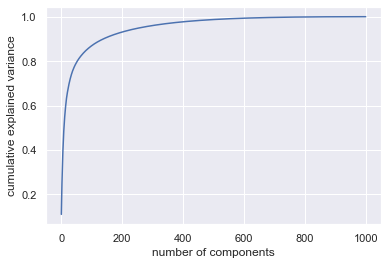

In [1559]:
pca = PCA().fit(x) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [1560]:
d = 170
pca = PCA(n_components=d)
pca.fit(x)
x_pca = pca.transform(x)
print("original shape: ", x.shape) 
print("transformed shape:", x_pca.shape)
print("d =",d)
print("data variance =", np.cumsum(pca.explained_variance_ratio_)[d-1]*100,"%")

original shape:  (1001, 2048)
transformed shape: (1001, 170)
d = 170
data variance = 91.678783012396 %


TASK 2

In [1561]:
from sklearn.metrics import pairwise_distances
def kmeans(dataset, metric, k):
    n_samples = dataset.shape[0]
    i = np.random.permutation(n_samples)[:k]
    centers = dataset[i]
    labels = np.random.randint(0, k-1, n_samples)
    new_labels = np.random.randint(0, k-1, n_samples)
    
    for i in range (100):
        distance = pairwise_distances(dataset, centers, metric = metric)
        for j in range (n_samples-1):
            new_labels[j] = np.argmin(distance[j])
        
        if (labels == new_labels).all():
            break
        else:
            labels = new_labels
            centers = [dataset[labels == i].mean(0) for i in range(k)]
        
    return labels

TASK 3

In [1562]:
from sklearn.metrics.pairwise import euclidean_distances
def db(dataset, labels):
    k = len(np.bincount(labels))
    centers = [dataset[labels == i].mean(0) for i in range(k)]
    cluster_k = [dataset[labels == i] for i in range(k)]
    centers_dist = euclidean_distances(centers, centers)
    S = []
    Ri = []

    for j in range (k):
        dist = euclidean_distances(cluster_k[j], centers)
        dist = dist.mean(0)
        S.append(dist[j])

    for i in range(k):
        Rij = []
        for j in range(k):
            if i != j:
                val = (S[i] + S[j]) / centers_dist[i,j]
                Rij.append(val)
        Ri.append(max(Rij)) 
   
    db = np.mean(Ri)
    
    return db

In [1563]:
from sklearn.metrics.pairwise import euclidean_distances
def sil(dataset, labels):
    n_samples = dataset.shape[0]
    k_freq = np.bincount(labels)
    k = len(k_freq)
    cluster_k = [dataset[labels == i] for i in range(k)]
    A = []
    B = []
    
    for i in range (k):
        a_val = euclidean_distances(cluster_k[i], cluster_k[i])
        a_val = a_val.sum(0)
        if (len(a_val)>1):
            a_val = a_val/(k_freq[i]-1)
        A.append(a_val)
    
    for i in range (k):
        bx = []
        stack = []
        for j in range (k):
            if i != j:
                dist = euclidean_distances(cluster_k[i], cluster_k[j])
                dist = dist.mean(1)
                if (len(stack) == 0):
                    stack = dist
                else:
                    stack = np.vstack([stack, dist])
        bmin = stack.min(0)
        B.append(bmin)

    A = np.concatenate(A)
    B = np.concatenate(B)
    C = B-A
    S = 0
    for i in range (n_samples):
        S = S + C[i]/max(A[i],B[i])
        
    return S/n_samples

TASK 4

In [1572]:
from sklearn.manifold import TSNE
k_means = kmeans(x_pca, euclidean, 3)
db_score = db(x_pca, k_means)
si_score = sil(x_pca, k_means)
print(db_score)
print(si_score)

3.4995686673292763
0.06228145309314634


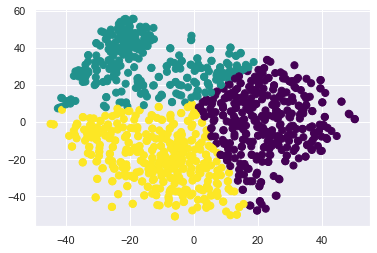

In [1573]:
tsne = TSNE(n_components=2, init='random', random_state=0)
X_TSNE = tsne.fit_transform(x_pca)
ktsne = kmeans(X_TSNE, euclidean, 3)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=ktsne, s=50, cmap='viridis')

TASK 5

In [1659]:
from comp4211 import sim
def dist(a, b):
    if(a==b).all():
        d = 0
        return d
    a = np.dot(a,a)
    b = np.dot(b,b)
    ab = np.sqrt(a*b)
    d = a + b - 2*ab*(sim(a,b,0.002))
    d = np.sqrt(d[0])
    return d

TASK 6

In [1661]:
k_sim = kmeans(x_pca,dist, 3)
db_score1 = db(x_pca, k_sim)
si_score1 = sil(x_pca, k_sim)
print(db_score1)
print(si_score1)

3.000689995676543
0.1363013112604449


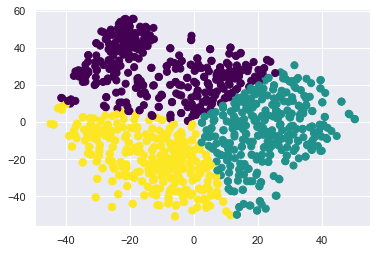

In [1663]:
tsne = TSNE(n_components=2, init='random', random_state=0)
X_TSNE = tsne.fit_transform(x_pca)
ktsne = kmeans(X_TSNE, euclidean, 3)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=ktsne, s=50, cmap='viridis')